# Problem Statement:
A Retail Company wants to analyze the relationship between Platform (Mobile, Web, Smart TV) and State (Maharashtra, Delhi, Karnataka, Tamil Nadu) on two different dependent variables:

### Customer Satisfaction Score

### Order Value

The company wants to see if there's a significant effect of Platform and State on these two dependent variables together, using MANOVA.

## Steps for Implementation:
1. Dataset Creation: 
We'll generate a dataset with Platform, State, and two dependent variables (Customer Satisfaction Score and Order Value).

2. MANOVA Analysis: 
We will perform a MANOVA using the statsmodels library to see if there is a significant effect of Platform and State on both dependent variables.

3. Interpretation: We'll interpret the results based on the p-values from the MANOVA.


In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.multivariate.manova import MANOVA

# Set the random seed for reproducibility
np.random.seed(2025)

# Create a synthetic dataset
n = 1000
states = ['Maharashtra', 'Delhi', 'Karnataka', 'Tamil Nadu']
platforms = ['Mobile', 'Web', 'Smart TV']

df = pd.DataFrame({
    'Customer_ID': range(1, n+1),
    'State': np.random.choice(states, n),
    'Platform': np.random.choice(platforms, n),
})

# Simulate Customer Satisfaction and Order Value based on Platform and State
df['Customer_Satisfaction'] = df.apply(lambda x: 
    np.random.normal(loc=80, scale=5) if x['Platform'] == 'Mobile' and x['State'] == 'Maharashtra' else
    np.random.normal(loc=85, scale=5) if x['Platform'] == 'Web' and x['State'] == 'Delhi' else
    np.random.normal(loc=78, scale=6) if x['Platform'] == 'Smart TV' and x['State'] == 'Karnataka' else
    np.random.normal(loc=82, scale=4), axis=1)

df['Order_Value'] = df.apply(lambda x: 
    np.random.normal(loc=2200, scale=800) if x['Platform'] == 'Mobile' and x['State'] == 'Maharashtra' else
    np.random.normal(loc=2300, scale=700) if x['Platform'] == 'Web' and x['State'] == 'Delhi' else
    np.random.normal(loc=2400, scale=750) if x['Platform'] == 'Smart TV' and x['State'] == 'Karnataka' else
    np.random.normal(loc=2350, scale=600), axis=1)

df.head()

,Customer_ID,State,Platform,Customer_Satisfaction,Order_Value
0,1,Karnataka,Mobile,73.702100,2341.773686
1,2,Karnataka,Mobile,86.264913,1662.316083
2,3,Karnataka,Smart TV,80.346681,3073.857608
3,4,Karnataka,Smart TV,88.570762,2909.985245
4,5,Maharashtra,Web,86.143319,1651.468355


Customer_ID              0
State                    0
Platform                 0
Customer_Satisfaction    0
Order_Value              0
dtype: int64


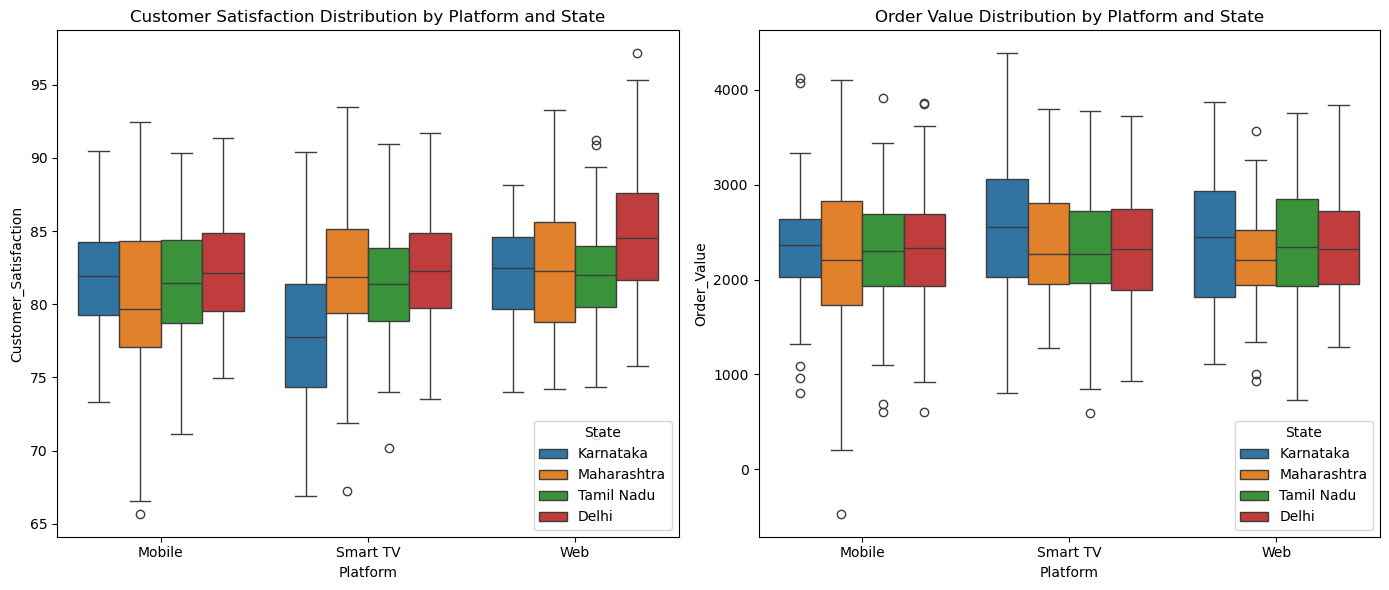

In [47]:
# Check for missing values
print(df.isnull().sum())

# Boxplots for visualizing the distributions of Customer Satisfaction and Order Value
plt.figure(figsize=(14, 6))

# Customer Satisfaction distribution
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Platform', y='Customer_Satisfaction', hue='State')
plt.title('Customer Satisfaction Distribution by Platform and State')

# Order Value distribution
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Platform', y='Order_Value', hue='State')
plt.title('Order Value Distribution by Platform and State')

plt.tight_layout()
plt.show()



In [49]:
# Perform MANOVA
manova = MANOVA.from_formula('Customer_Satisfaction + Order_Value ~ Platform + State', data=df)

# Run MANOVA
manova_results = manova.mv_test()

# Print MANOVA results
print("\nMANOVA Results:\n", manova_results)

# Interpretation and business impact based on MANOVA results
print("\nExtracting p-values and interpreting:")

# Extracting p-values for Platform and State
platform_p_value = manova_results['Platform']['stat']['Pr > F'][0]  # p-value for Platform
state_p_value = manova_results['State']['stat']['Pr > F'][0]  # p-value for State

# Printing p-values
print(f"Platform p-value: {platform_p_value}")
print(f"State p-value: {state_p_value}")




MANOVA Results:
                     Multivariate linear model
                                                                 
-----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value   Pr > F
-----------------------------------------------------------------
          Wilks' lambda  0.0162 2.0000 993.0000 30140.3351 0.0000
         Pillai's trace  0.9838 2.0000 993.0000 30140.3351 0.0000
 Hotelling-Lawley trace 60.7056 2.0000 993.0000 30140.3351 0.0000
    Roy's greatest root 60.7056 2.0000 993.0000 30140.3351 0.0000
-----------------------------------------------------------------
                                                                 
-----------------------------------------------------------------
           Platform        Value  Num DF   Den DF  F Value Pr > F
-----------------------------------------------------------------
             Wilks' lambda 0.9687 4.0000 1986.0000  7.9468 0.0000
            

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_11860\3717451201.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  platform_p_value = manova_results['Platform']['stat']['Pr > F'][0]  # p-value for Platform
C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_11860\3717451201.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  state_p_value = manova_results['State']['stat']['Pr > F'][0]  # p-value for State


In [51]:
# Interpretation of the p-values
if platform_p_value < 0.05:
    print(f"✅ Significant effect of Platform on Customer Satisfaction and Order Value.")
else:
    print(f"❌ No significant effect of Platform on Customer Satisfaction and Order Value.")

if state_p_value < 0.05:
    print(f"✅ Significant effect of State on Customer Satisfaction and Order Value.")
else:
    print(f"❌ No significant effect of State on Customer Satisfaction and Order Value.")

# Business Impact
print("\n🎯 Business Impact:")
if platform_p_value < 0.05:
    print(f"✅ Significant effect of Platform: Tailor marketing and sales strategies based on platform preferences.")
else:
    print(f"❌ No significant effect of Platform: General strategies can be used.")

if state_p_value < 0.05:
    print(f"✅ Significant effect of State: Tailor strategies to specific states.")
else:
    print(f"❌ No significant effect of State: General strategies can be used across states.")


✅ Significant effect of Platform on Customer Satisfaction and Order Value.
✅ Significant effect of State on Customer Satisfaction and Order Value.

🎯 Business Impact:
✅ Significant effect of Platform: Tailor marketing and sales strategies based on platform preferences.
✅ Significant effect of State: Tailor strategies to specific states.
